In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv(r"C:\DATASETS\cars_price.zip",encoding='latin-1')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [5]:
df=df.drop(columns=['Company Names','Cars Names'])

In [6]:
df.head(4)

,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm


In [7]:
import re

In [8]:
def extract_num(data):
    if pd.isna(data):
        return None
    num=re.findall(r'\d+\.?\d*',data)   
    if not num:
        return None
    return float(num[0])
    

In [9]:
def extract_mean_num(data):
    if pd.isna(data):
        return None
    num=re.findall(r'\d+\.?\d*',data)   
    if len(num)==2:
        return (float(num[0])+float(num[1]))/2
    elif len(num)==1:
     return float(num[0])
    
        
    return None
    

In [10]:
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(extract_mean_num)
df['HorsePower'] = df['HorsePower'].apply(extract_mean_num)
df['Total Speed'] = df['Total Speed'].apply(extract_num)
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(extract_mean_num)
df['Torque'] = df['Torque'].apply(extract_mean_num)


In [11]:
def extract_power(data):
    if pd.isna(data):
        return pd.Series([None,None])

    data=str(data).lower()
    
    cyl=None
    matchcyl=re.search(r'v(\d+)',data) or re.search(r'i(\d+)',data)
    if matchcyl:
     cyl=int(matchcyl.group(1))

    liter=None
    matchl=re.search(r'(\d+\.?\d*)\s*l',data)
    if matchl:
        liter = float(matchl.group(1))

    return pd.Series([cyl,liter])

In [12]:
df[['engine_cyl', 'engine_liter']] = df['Engines'].apply(extract_power)

In [13]:
df['engine_cyl']=df['engine_cyl'].fillna(value=df['engine_cyl'].median())

In [14]:
df['engine_liter']=df['engine_liter'].fillna(value=df['engine_liter'].median())

In [15]:
df.dropna(inplace=True)

In [16]:
df=df.drop(columns=['Engines'])

In [17]:
df['Seats'].unique()

array(['2', '5', '4', '2+2', '7', '8', '12', '3', '9', '6', '1',
       '2\x9615', '2\x967', '2\x966', '7\x968', '2\x969', '2\x9612'],
      dtype=object)

In [18]:
def fueltype(data):
    if pd.isna(data):
        return None
    type=None
    data=str(data).lower()
    if 'electric' in data  or 'ev' in data:
        return 'electric'
    elif 'petrol' in data:
        return 'petrol'
    elif 'diesel' in data:
        return 'diesel'
    elif 'hybrid' in data:
        return 'hybrid'
    else:
        return 'Other'

In [19]:
df['Fuel Types']=df['Fuel Types'].apply(fueltype)

In [20]:
def seats(data):
    if pd.isna(data):
        return None
    data=str(data) 
    num=re.findall(r'\d+',data)
    if len(num)==1:
        return int(num[0])
    elif len(num)==2:
        return (int(num[0])+int(num[1]))
    elif len(num)>2:
        return int(num[0])

In [21]:
df['Seats']=df['Seats'].apply(seats)

In [22]:
def clean_price(text):
    if pd.isna(text):
        return None
    
    text = str(text)
    
    text=text.replace(',', '')         
    text = text.replace('$', '')          
    text = text.replace('\x96', '-') 
    text=text.replace('\x80','-')
    
    nums = re.findall(r'\d+\.?\d*', text)
    
    if len(nums) == 2:
        return (float(nums[0]) + float(nums[1])) / 2
    elif len(nums) == 1:
        return float(nums[0])
    else:
        return None

In [23]:
df['Cars Prices']=df['Cars Prices'].apply(clean_price)

In [24]:
df.dropna(inplace=True)

### Original dataset

In [25]:
df1=pd.read_csv(r"C:\DATASETS\cars_price.zip",encoding='latin-1')
df1.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


### After Preprocessing and Cleaning

In [26]:
df.head()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,engine_cyl,engine_liter
0,3990.0,963.0,340.0,2.5,1100000.0,Other,2,800.0,8.0,2.4
1,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0,12.0,2.4
2,100.5,77.5,165.0,10.5,13500.0,petrol,5,120.0,6.0,1.2
3,492.5,630.0,250.0,3.2,161000.0,petrol,4,900.0,8.0,2.4
4,104.5,602.0,320.0,3.6,253290.0,petrol,2,560.0,10.0,2.4


In [27]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['CC/Battery Capacity',
 'HorsePower',
 'Total Speed',
 'Performance(0 - 100 )KM/H',
 'Cars Prices',
 'Seats',
 'Torque',
 'engine_cyl',
 'engine_liter']

In [28]:
transformer=ColumnTransformer(transformers=[('scale',MinMaxScaler(),['CC/Battery Capacity',
'HorsePower', 'Performance(0 - 100 )KM/H','Seats','Torque','engine_cyl','engine_liter']),('encode',OrdinalEncoder(categories=[['petrol','diesel','hybrid','electric','Other']]),['Fuel Types'])],remainder='passthrough')

In [29]:
from sklearn.ensemble import VotingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
vr=VotingRegressor(estimators=[('lr',LinearRegression()),('dtr',DecisionTreeRegressor(max_depth=7,max_leaf_nodes=5))])
br=BaggingRegressor(estimator=LinearRegression(),max_samples=0.25)

In [30]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Cars Prices'])
y=df.iloc[:,4]
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.25)

In [31]:
pipe_lr = Pipeline([
    ('preprocess', transformer),
    ('model', LinearRegression())
])

pipe_dt = Pipeline([
    ('preprocess', transformer),
    ('model', DecisionTreeRegressor(max_depth=7, max_leaf_nodes=5))
])


In [32]:
vr = VotingRegressor(
    estimators=[
        ('lr', pipe_lr),
        ('dtr', pipe_dt)
    ]
)


In [33]:
vr.fit(xtr,ytr)

,estimators,"[('lr', ...), ('dtr', ...)]"
,weights,None
,n_jobs,None
,verbose,False
,transformers,"[('scale', ...), ('encode', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### For Visualization

In [34]:
from sklearn.decomposition import PCA

In [43]:
df2=pd.DataFrame()

In [49]:
x=df.drop(columns=['Fuel Types'])

In [50]:
pca=PCA(n_components=2)
df2[['PCA1','PCA2']]=pca.fit_transform(x)

In [52]:
scale=MinMaxScaler()

In [54]:
df2[['PCA1','PCA2']]=scale.fit_transform(df2)

In [60]:
df2['Sale Prices']=x[['Cars Prices']].values

In [70]:
x1=df2.drop(columns=['Sale Prices'])
y1=df2.iloc[:,-1]

In [72]:
dtr=DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)
dtr.fit(x1,y1)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [129]:
xmin,xmax=df2['PCA1'].min()-0.5,df2['PCA1'].max()+0.5
ymin,ymax=df2['PCA2'].min()-0.5,df2['PCA1'].max()+0.5

In [130]:
df2['PCA2'].min()

0.0

In [131]:
X=np.linspace(xmin,xmax,900)
Y=np.linspace(ymin,ymax,900)

In [132]:
xx,yy=np.meshgrid(X,Y)

C:\Users\ACER\anaconda3\envs\AI_env1\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


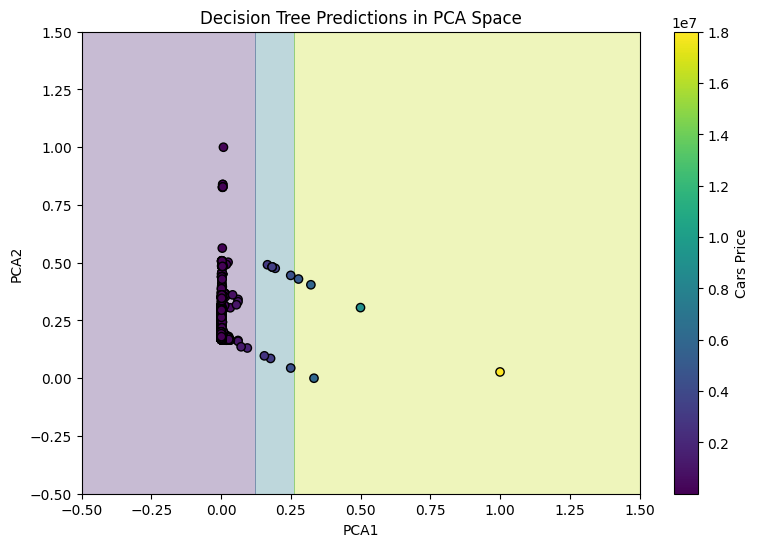

In [133]:
Z = dtr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(x1['PCA1'], x1['PCA2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.colorbar(label='Cars Price')
plt.title("Decision Tree Predictions in PCA Space")
plt.show()

In [ ]:
plt